# Logistic regression

In [12]:
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
## from sklearn.cross_validation import train_test_split is depreciated use sklearn.model_selection
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
from IPython.display import Image ## to display Image in notebook itself
from statsmodels.formula.api import logit
from sklearn.metrics import classification_report

In [ ]:
## Logistic Regression:- in this our output is binary or logical like Yes/Or no A/B/C..
## the value can be 0 or 1. we determine the probablity of Y being 1 or 0
## if it is greater than 0.5 then it is 1 or else 0
## generally if we have Y as 0 and 1 then our equation gives us the probability of it being 1 
## thus if Y- >0.5 then it is 1 else it is 0


In [5]:
iris_data = load_iris()
iris_data.target
## creating datafram throgh sklearn.Datasets

data = pd.DataFrame(iris_data.data,columns=['sepal length','sepal width','petal length','petal width'])

# iris_data.feature_names
# data.rename(columns={'0':'sepal length','1':'sepal width','2':'petal length','3':'petal '},inplace=True)
data['species'] = (iris_data.target)
print(data)

     sepal length  sepal width  petal length  petal width  species
0             5.1          3.5           1.4          0.2        0
1             4.9          3.0           1.4          0.2        0
2             4.7          3.2           1.3          0.2        0
3             4.6          3.1           1.5          0.2        0
4             5.0          3.6           1.4          0.2        0
5             5.4          3.9           1.7          0.4        0
6             4.6          3.4           1.4          0.3        0
7             5.0          3.4           1.5          0.2        0
8             4.4          2.9           1.4          0.2        0
9             4.9          3.1           1.5          0.1        0
10            5.4          3.7           1.5          0.2        0
11            4.8          3.4           1.6          0.2        0
12            4.8          3.0           1.4          0.1        0
13            4.3          3.0           1.1          0.1     

#  KNN Classification algorithm

###### https://www.youtube.com/watch?v=RlQuVL6-qe8&index=3&list=PL5-da3qGB5ICeMbQuqbbCOQWcS6OYBr5A

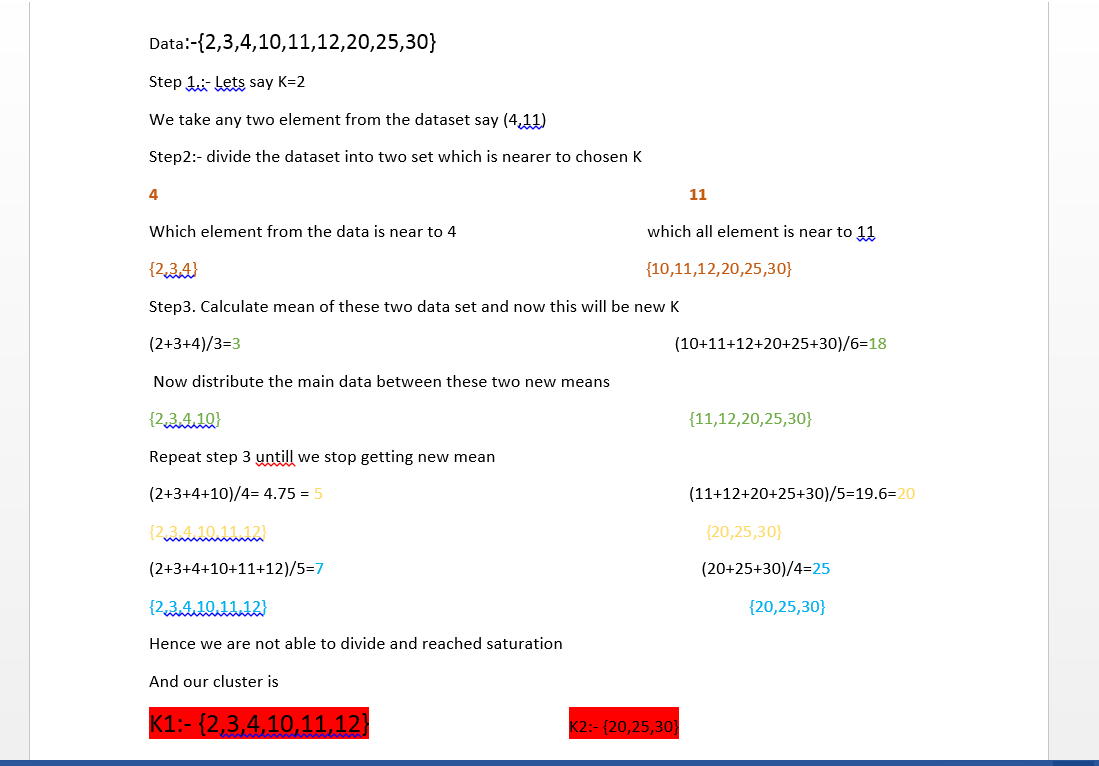

In [6]:
Image(filename="K-MeanCluster.png", width=700,height=400)

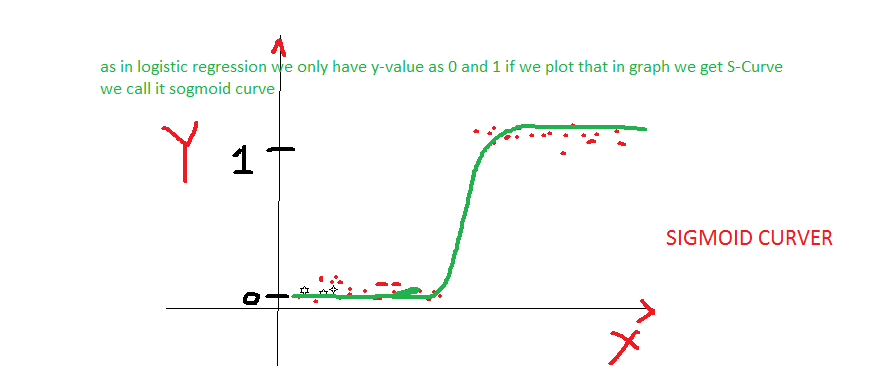

In [2]:
Image(filename="LogisticRegression-Sigmoid-Curver.png", width=700,height=400)

In [6]:
## logistic regression KNN algorithm
iris_data = load_iris()
X=iris_data.data
y = iris_data.target
print(X.shape)
print(y.shape)
model_logistic_iris = KNeighborsClassifier(n_neighbors=1)
print(model_logistic_iris)


(150, 4)
(150,)
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')


In [7]:
## its a best practice to use test_size or train_size
X_train_iris,X_test_iris,y_train_iris,y_test_iris = train_test_split(X,y,random_state=1,test_size=0.4)
model_logistic_iris.fit(X_train_iris,y_train_iris)
y_pred_iris = model_logistic_iris.predict(X_test_iris)
print(y_test_iris)
print(metrics.accuracy_score(y_test_iris,y_pred_iris))

[0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 1 0 2 1 0 0 1 2 1 2 1 2 2 0 1
 0 1 2 2 0 2 2 1 2 0 0 0 1 0 0 2 2 2 2 2 1 2 1]
0.966666666667


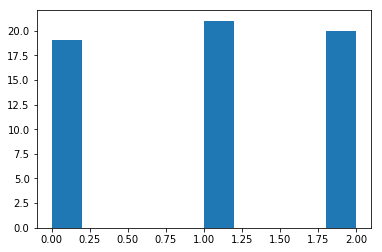

In [162]:
plt.hist(y_pred_iris)
plt.show()

In [42]:
## to know which K-value will yeild highest accuracy

score=[]
for i in range(1,30):
    model_logistic_iris = KNeighborsClassifier(n_neighbors=i)    
    model_logistic_iris.fit(X_train_iris,y_train_iris)
    y_pred_iris = model_logistic_iris.predict(X_test_iris)
    score.append(metrics.accuracy_score(y_test_iris,y_pred_iris))
   # print(score)
print(np.max(score))    

0.983333333333


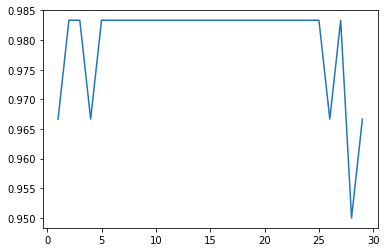

In [38]:
%matplotlib inline
plt.plot(range(1,30),score)
## so in the below graph we see that K-value ranging from 6 to 22 are good



In [9]:
## logistic Regression model
## from sklearn.linear_model import LogisticRegression
model_iris_logistic = LogisticRegression()
model_iris_logistic.fit(X_train_iris,y_train_iris)
y_pred_iris_logistic = model_iris_logistic.predict(X_test_iris)
score_logistc = metrics.accuracy_score(y_test_iris,y_pred_iris_logistic)
print(score_logistc)
print(y_pred_iris_logistic)

0.9
[0 1 1 0 2 2 2 0 0 2 1 0 2 1 1 0 1 2 0 0 1 2 1 0 2 1 0 0 1 2 1 2 1 2 2 0 1
 0 1 2 2 0 1 2 1 2 0 0 0 2 0 0 2 2 2 2 2 2 2 1]


# Logistic regression with diabetic data


###### https://www.youtube.com/watch?v=0pP4EwWJgIU&index=4&list=PL5-da3qGB5ICeMbQuqbbCOQWcS6OYBr5A
###### https://www.youtube.com/watch?v=XnOAdxOWXWg&t=17s

In [3]:
diabetic_data = pd.read_csv("Diabetes.csv",header=0)
## CATEGORICAL VALUE TO BINARY MANUALLY 
dummy_col =[]
for i in range(0,np.size(diabetic_data[' Class variable'])):
    if (diabetic_data[' Class variable'][i]=='YES'):
        dummy_col.append(1)
    else:
        dummy_col.append(0)
dummy_col        


[1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,


In [4]:
diabetic_data['Class_Varibale'] = dummy_col

In [5]:
diabetic_data.columns

Index([' Number of times pregnant', ' Plasma glucose concentration',
       ' Diastolic blood pressure', ' Triceps skin fold thickness',
       ' 2-Hour serum insulin', ' Body mass index',
       ' Diabetes pedigree function', ' Age (years)', ' Class variable',
       'Class_Varibale'],
      dtype='object')

In [6]:
##print(diabetic_data.head())
diabetic_data.drop(' Class variable',axis=1,inplace=True)
diabetic_data.head()


,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age (years),Class_Varibale
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
diabetic_data.rename(columns={' Number of times pregnant':'Number of times pregnant', ' Plasma glucose concentration':'Plasma glucose concentration',
       ' Diastolic blood pressure':'Diastolic blood pressure', ' Triceps skin fold thickness':'Triceps skin fold thickness',
       ' 2-Hour serum insulin':'2-Hour serum insulin', ' Body mass index':'Body mass index',
       ' Diabetes pedigree function':'Diabetes pedigree function', ' Age (years)':'Age'},inplace=True)

In [8]:
diabetic_data.columns

Index(['Number of times pregnant', 'Plasma glucose concentration',
       'Diastolic blood pressure', 'Triceps skin fold thickness',
       '2-Hour serum insulin', 'Body mass index', 'Diabetes pedigree function',
       'Age', 'Class_Varibale'],
      dtype='object')

In [9]:
X = diabetic_data[['Number of times pregnant', 'Plasma glucose concentration',
       'Diastolic blood pressure', 'Triceps skin fold thickness',
       '2-Hour serum insulin', 'Body mass index', 'Diabetes pedigree function',
       'Age']]
y = diabetic_data['Class_Varibale']
X_train_diab,X_test_diab,y_train_diab,y_test_diab = train_test_split(X,y,test_size=0.3,random_state=2)
model_diab = LogisticRegression()

In [10]:
print(X_train_diab.shape)
print(X_test_diab.shape)
print(y_train_diab.shape)
print(y_test_diab.shape)

(537, 8)
(231, 8)
(537,)
(231,)


In [11]:
model_diab.fit(X_train_diab,y_train_diab)
print(model_diab.intercept_)
print(model_diab.coef_)
y_pred_diab = model_diab.predict(X_test_diab)
print(metrics.accuracy_score(y_test_diab,y_pred_diab))
metrics.confusion_matrix(y_test_diab,y_pred_diab)

[-5.15803474]
[[ 0.19775826  0.02873533 -0.02153554  0.00185612 -0.00082337  0.05314833
   0.76103734 -0.01074243]]
0.7359307359307359


array([[138,  17],
       [ 44,  32]], dtype=int64)

In [14]:
print(classification_report(y_test_diab,y_pred_diab))

             precision    recall  f1-score   support

          0       0.76      0.89      0.82       155
          1       0.65      0.42      0.51        76

avg / total       0.72      0.74      0.72       231



# confusion matrix

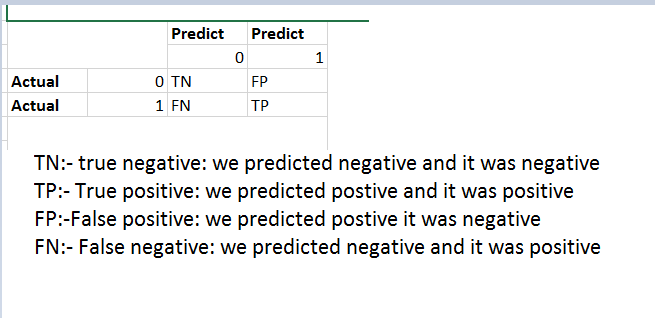

In [116]:
Image(filename="confusion_matrix.png", width=700,height=400)

In [113]:
print("TRUE:",(y_test_diab.values))
print("PRED",(y_pred_diab))

TRUE: [0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 1 0 1 0 0 1 0 1 0 1 1 0 0 0 1 0
 0 0 0 0 1 1 0 0 0 0 1 0 0 1 1 0 0 1 0 1 0 0 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0
 1 1 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1
 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0
 0 1 1 0 1 0 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0
 0 0 0 1 0 1 1 0 0]
PRED [0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0
 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0
 0 0 0 1 0 0 1 1 0]


In [56]:
## COUNT SOMETHING IN lIST COUNT IN LIST SEARCH IN LIST
## CONTING NUMBER OF 1 AND 0 IN LIST 
dummy_col.count(0)

500

In [130]:
diabetic_data.columns

Index([' Number of times pregnant', ' Plasma glucose concentration',
       ' Diastolic blood pressure', ' Triceps skin fold thickness',
       ' 2-Hour serum insulin', ' Body mass index',
       ' Diabetes pedigree function', ' Age (years)', ' Class variable'],
      dtype='object')

In [131]:
## dummy variables in python or ## convert categorical variable into binary variable 
## method i map series method 
diabetic_data_temp = pd.read_csv("Diabetes.csv",header=0)
diabetic_data_temp['dummy_var'] = diabetic_data_temp[' Class variable'].map({'YES':1,'NO':0})
diabetic_data_temp

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age (years),Class variable,dummy_var
0,6,148,72,35,0,33.6,0.627,50,YES,1
1,1,85,66,29,0,26.6,0.351,31,NO,0
2,8,183,64,0,0,23.3,0.672,32,YES,1
3,1,89,66,23,94,28.1,0.167,21,NO,0
4,0,137,40,35,168,43.1,2.288,33,YES,1
5,5,116,74,0,0,25.6,0.201,30,NO,0
6,3,78,50,32,88,31.0,0.248,26,YES,1
7,10,115,0,0,0,35.3,0.134,29,NO,0
8,2,197,70,45,543,30.5,0.158,53,YES,1
9,8,125,96,0,0,0.0,0.232,54,YES,1


In [93]:
## dummy variables in python or ## convert categorical variable into binary variable 
## method 2 get_dummies from pandas module
## in this method we get a new dataframe and we have to concate it to the original datafram
diabetic_data_temp = pd.read_csv("Diabetes.csv",header=0)
Class_variables = pd.get_dummies(data=diabetic_data_temp[' Class variable'])
diabetic_data_temp = pd.concat([diabetic_data_temp,Class_variables],axis=1)
## diabetic_data_temp = pd.concat(diabetic_data_temp,Class_variable)
diabetic_data_temp
## now we have got the variable in two column not we need to take one column only because if one is 0 then 
## other will be 1 by 
## droping coluimn No
diabetic_data_temp.drop('NO',axis=1,inplace=True)
diabetic_data_temp

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age (years),Class variable,YES
0,6,148,72,35,0,33.6,0.627,50,YES,1
1,1,85,66,29,0,26.6,0.351,31,NO,0
2,8,183,64,0,0,23.3,0.672,32,YES,1
3,1,89,66,23,94,28.1,0.167,21,NO,0
4,0,137,40,35,168,43.1,2.288,33,YES,1
5,5,116,74,0,0,25.6,0.201,30,NO,0
6,3,78,50,32,88,31.0,0.248,26,YES,1
7,10,115,0,0,0,35.3,0.134,29,NO,0
8,2,197,70,45,543,30.5,0.158,53,YES,1
9,8,125,96,0,0,0.0,0.232,54,YES,1


In [157]:
diabetic_data_stat=diabetic_data.rename(columns={'Number of times pregnant':'Number_of_times_pregnant',
                                                 'Plasma glucose concentration':'Plasma_glucose_concentration',
       'Diastolic blood pressure':'Diastolic_blood_pressure', 'Triceps skin fold thickness':'Triceps_skin_fold_thickness',
       '2-Hour serum insulin':'Hour_serum_insulin', 'Body mass index':'Body_mass_index', 
                                                 'Diabetes pedigree function':'Diabetes_pedigree_function'})

In [158]:
model_stat_logit = logit(formula="Class_variable2~Number_of_times_pregnant+Plasma_glucose_concentration+Hour_serum_insulin+Diastolic_blood_pressure+Triceps_skin_fold_thickness+Body_mass_index+Diabetes_pedigree_function",data=diabetic_data_stat).fit()
## 2-Hour_serum_insulin
model_stat_logit.summary()

Optimization terminated successfully.
         Current function value: 0.472635
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        Class_variable2   No. Observations:                  768
Model:                          Logit   Df Residuals:                      760
Method:                           MLE   Df Model:                            7
Date:                Mon, 23 Apr 2018   Pseudo R-squ.:                  0.2693
Time:                        14:33:49   Log-Likelihood:                -362.98
converged:                       True   LL-Null:                       -496.74
                                        LLR p-value:                 5.151e-54
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       -8.1737      0.696    -11.738      0.000      -9.538      -6.809
Number_of_times_pregnant         0.1485      0.028      5.282      0.000       0.093       0.204
Plasma_glucose_concentration     0.0364      0.004      9.947      0.000       0.029       0.044
Hour_serum_insulin              -0.0013      0.001     -1.426      0.154      -0.003       0.000
Diastolic_blood_pressure        -0.0118      0.005     -2.299      0.021      -0.022      -0.002
Triceps_skin_fold_thickness     -0.0004      0.007     -0.055      0.956      -0.014       0.013
Body_mass_index                  0.0881      0.015      5.863      0.000       0.059       0.117
Diabetes_pedigree_function       0.9675      0.298      3.242      0.001       0.383       1.552
================================================================================================
"""

In [159]:
## if we see sumary here we can see that some features are having a p-value > 0.05 so we ideally should remove these features
## lets remove Hours_serm_insulin and triceps_skin_fold_thickness 
## and rebuild our model
model_stat_logit = logit(formula="Class_variable2~Number_of_times_pregnant+Plasma_glucose_concentration+Diastolic_blood_pressure+Body_mass_index+Diabetes_pedigree_function",data=diabetic_data_stat).fit()
## 2-Hour_serum_insulin
model_stat_logit.summary()

Optimization terminated successfully.
         Current function value: 0.474323
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        Class_variable2   No. Observations:                  768
Model:                          Logit   Df Residuals:                      762
Method:                           MLE   Df Model:                            5
Date:                Mon, 23 Apr 2018   Pseudo R-squ.:                  0.2667
Time:                        17:07:41   Log-Likelihood:                -364.28
converged:                       True   LL-Null:                       -496.74
                                        LLR p-value:                 3.442e-55
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       -7.9550      0.676    -11.771      0.000      -9.280      -6.630
Number_of_times_pregnant         0.1535      0.028      5.514      0.000       0.099       0.208
Plasma_glucose_concentration     0.0347      0.003     10.213      0.000       0.028       0.041
Diastolic_blood_pressure        -0.0120      0.005     -2.387      0.017      -0.022      -0.002
Body_mass_index                  0.0848      0.014      6.006      0.000       0.057       0.113
Diabetes_pedigree_function       0.9106      0.294      3.097      0.002       0.334       1.487
================================================================================================
"""